<a href="https://colab.research.google.com/github/OshidiWeerakulasuriya/Practice-Python/blob/master/UpdatedOverallSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries 
import numpy as np   
import pandas as pd  
  
# Import dataset 
dataset = pd.read_csv('/98AcresResortReviews.csv')

In [ ]:
dataset

,Date,Title,Review
0,Date of stay: August 2020,Best Place to relax in Ella,A two night stay at 98 Acres was my 1st year a...
1,Date of stay: October 2020,Best resort experience,Best place to release stress and calm your min...
2,Date of stay: September 2020,Hillside bliss,An amazing experience. Let me paint a picture ...
3,Date of stay: October 2020,Celebrate my husband's birthday with amazing view,I chose 98 Acres as a gift to my hubby's birth...
4,Date of stay: September 2020,A “MUST DO” in Ella!!!,Located in close proximity to all the main tou...
...,...,...,...
1880,Date of stay: August 2012,"98 Acres, is the best place for destressing",Great resort. The best thing about it is the s...
1881,Date of stay: August 2012,Not recommended except for the view,Spectacular setting sadly the only plus. For t...
1882,Date of stay: August 2012,Very good but could be better,The view from the hotel is absolutely stunning...
1883,Date of stay: August 2012,Great location but dirty rooms and terrible staff,We stayed for one night in this hotel that we ...


In [ ]:
df = pd.DataFrame(dataset.Review)

In [ ]:
import re
import nltk

# Cleaning the tweets
# Creating a function called clean. removing hyperlink, #, RT, @mentions
def clean(x):
 # keep only words
  #regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
  #x = x.str.replace(regex_pat, '', x)
  #x = re.compile(r'[^a-zA-Z\s]+', '', x)
  x = re.sub(r'^RT[\s]+', '', x)
  x = re.sub(r'https?:\/\/.*[\r\n]*', '', x)
  x = re.sub(r'#', '', x)
  x = re.sub(r'@[A-Za-z0–9]+', '', x) 
  return x

df['Review'] = df['Review'].apply(clean)

In [ ]:
df

,Review
0,A two night stay at 98 Acres was my 1st year a...
1,Best place to release stress and calm your min...
2,An amazing experience. Let me paint a picture ...
3,I chose 98 Acres as a gift to my hubby's birth...
4,Located in close proximity to all the main tou...
...,...
1880,Great resort. The best thing about it is the s...
1881,Spectacular setting sadly the only plus. For t...
1882,The view from the hotel is absolutely stunning...
1883,We stayed for one night in this hotel that we ...


In [ ]:
from textblob import TextBlob

polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Review'].apply(polarity)
df['subjectivity'] = df['Review'].apply(subjectivity)

In [ ]:
df

,Review,polarity,subjectivity
0,A two night stay at 98 Acres was my 1st year a...,0.619444,0.814444
1,Best place to release stress and calm your min...,0.457143,0.692857
2,An amazing experience. Let me paint a picture ...,0.544560,0.666667
3,I chose 98 Acres as a gift to my hubby's birth...,0.431410,0.561538
4,Located in close proximity to all the main tou...,0.332946,0.523274
...,...,...,...
1880,Great resort. The best thing about it is the s...,0.298750,0.647250
1881,Spectacular setting sadly the only plus. For t...,-0.013393,0.626786
1882,The view from the hotel is absolutely stunning...,0.297051,0.732692
1883,We stayed for one night in this hotel that we ...,0.028148,0.502222


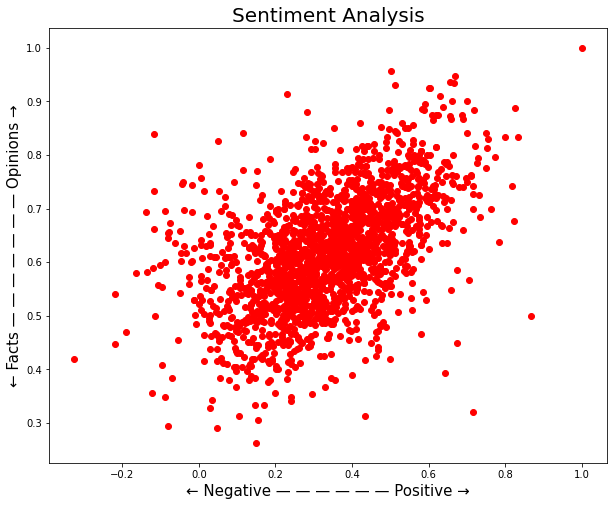

In [ ]:
# Let’s plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
for index, Tweets in enumerate(df.index):
 x = df.polarity.loc[Tweets]
 y = df.subjectivity.loc[Tweets]
 plt.scatter(x, y, color='Red')
 
 
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.show()

In [ ]:
# Creating function for calculating positive, negative and neutral
# More than 1 --> Positive, equal to 0 --> neutral and less than 0 --> Negative
def ratio(x):
 if x > 0:
  return 1
 elif x == 0:
  return 0
 else:
  return -1
df['analysis'] = df['polarity'].apply(ratio)

In [ ]:
#Download the file with sentiment analysis

from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

data = pd.read_csv("/df.csv",encoding='UTF-8')

In [ ]:
#Eliminating punctuations

import string
import re

punctuations = string.punctuation 
punctuations_pattern = r"[{}]".format(punctuations)

data['Review'] = data.apply(lambda row: ' '.join(re.sub(punctuations_pattern,"",row["Review"]).split()), axis=1)


In [ ]:
#Sentence tokenization

import nltk
nltk.download('punkt')

sent_tokens = data.apply(lambda row: nltk.sent_tokenize(row["Review"]), axis=1)

sent_tokens


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [A two night stay at 98 Acres was my 1st year ...
1       [Best place to release stress and calm your mi...
2       [An amazing experience Let me paint a picture ...
3       [I chose 98 Acres as a gift to my hubbys birth...
4       [Located in close proximity to all the main to...
                              ...                        
1880    [Great resort The best thing about it is the s...
1881    [Spectacular setting sadly the only plus For t...
1882    [The view from the hotel is absolutely stunnin...
1883    [We stayed for one night in this hotel that we...
1884    [This is a fantastic resort i have never belie...
Length: 1885, dtype: object

In [ ]:
#Merging into a single document for data cleaning

import itertools

doc_complete = list(itertools.chain.from_iterable(list(sent_tokens)))

doc_complete

['A two night stay at 98 Acres was my 1st year anniversary gift by my husbandIts absolutely a fantastic resort with a breathtaking panoramic viewThe property is soo beautiful and was a splendid stay in the rustic interiorThe staff is soo friendly and love the delicious foodThe Candle light Dinner arrangement for our anniversary celebration was very well organized with a lovely cakeThere was a staff member called Prasanna who was soo pleasant helpful he treated us soo well with great hospitalityAlso Flying Rawana was a great experience with sufficient safety instructionsIt was indeed a fabulous a memorable stay at 98 acresWill be visiting again ❤❤❤',
 'Best place to release stress and calm your mind See the pictures below you can stay whole day all day alonggood food excellent staff Rain or no rain Sun or not you can stay whole day at room only not boring',
 'An amazing experience Let me paint a picture for you Close your eyes and dream about spending a weekend at a cottage over the hil

In [ ]:
#Cleaning data(Removal of stop words and punctuations)

import string
from nltk.stem import WordNetLemmatizer 
import gensim
nltk.download('wordnet')
  
lemmatizer = WordNetLemmatizer()



stop = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours',
         'yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself',
         'they','the','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these',
         'those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing',
         'a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
         'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off',
         'over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each',
         'few','more','most','other','some','such','only','own','same','so','than','too','very','s','t','can','will','just',
         'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren']

def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    lemmatized = ''.join(lemmatizer.lemmatize(word) for word in stop_free)
    bigram_mod = bigrams(lemmatized)
    bigram = ''.join(bigram_mod[lemmatized])
    #print(bigram)
    return bigram

data_clean = [clean(doc).split() for doc in doc_complete]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
len(data_clean)

1885

In [ ]:
import itertools

words = list(itertools.chain.from_iterable(data_clean))

In [ ]:
nltk.download('averaged_perceptron_tagger')

pos = nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import files

POS = pd.DataFrame(pos)

POS.to_csv('POS.csv')
files.download('POS.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
POS = pd.read_csv('/POS.csv')

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [ ]:
POS[POS['tag']=='WRB']['word']

21215      whenever
24460    atmosphere
43234      whenever
65909      wherever
67681      whenever
Name: word, dtype: object

In [ ]:
POS

,Unnamed: 0,word,tag
0,0,two,CD
1,1,night,NN
2,2,stay,NN
3,3,98,CD
4,4,acres,NNS
...,...,...,...
97306,97306,agree,JJ
97307,97307,clients,NNS
97308,97308,friends,VBZ
97309,97309,98,CD


In [ ]:
pos = dict(pos)

In [ ]:
#Preparing Document-Term Matrix

# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_final)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_final]

In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word = dictionary, passes=50)

In [ ]:
# Print the Keyword in the 10 topics
print(ldamodel.print_topics())
#doc_lda = lda_model[corpus]

[(0, '0.014*"food" + 0.014*"not" + 0.012*"room" + 0.010*"staff" + 0.010*"hotel" + 0.009*"views" + 0.008*"sri" + 0.008*"service" + 0.007*"location" + 0.007*"stay"'), (1, '0.017*"room" + 0.016*"not" + 0.012*"rooms" + 0.011*"hotel" + 0.011*"food" + 0.011*"view" + 0.010*"staff" + 0.010*"place" + 0.009*"service" + 0.008*"good"'), (2, '0.023*"staff" + 0.023*"place" + 0.016*"food" + 0.014*"friendly" + 0.012*"hotel" + 0.011*"service" + 0.011*"stay" + 0.011*"great" + 0.010*"acres" + 0.009*"good"'), (3, '0.016*"hotel" + 0.015*"little" + 0.015*"views" + 0.014*"peak" + 0.014*"ella" + 0.014*"rooms" + 0.014*"tea" + 0.013*"adams" + 0.012*"restaurant" + 0.012*"good"'), (4, '0.010*"view" + 0.009*"really" + 0.006*"hotel" + 0.006*"room" + 0.006*"amazing" + 0.006*"treatment" + 0.006*"food" + 0.005*"spa" + 0.005*"place" + 0.005*"service"'), (5, '0.028*"room" + 0.013*"stayed" + 0.012*"views" + 0.012*"little" + 0.012*"peak" + 0.011*"view" + 0.010*"adams" + 0.010*"hotel" + 0.009*"great" + 0.009*"breakfast"')]

In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_final, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.340417742108008

Coherence Score:  0.3280514603917382


In [46]:
from google.colab import files

dfinal = pd.DataFrame(data_final)

dfinal.to_csv('dfinal.csv')
files.download('dfinal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>